In [352]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

e = 0.1
steps = 3000
ave_reward = 0

estimated_values = []
for _ in range(10):
    estimated_values.append(random.gauss(0, 1))

bandits = []
#i is needed to index the estimated_values list
for i in range(10):
    bandits.append([i, random.gauss(0, 1), 1])

counts = []
for _ in range(10):
    counts.append(1)

df = pd.DataFrame(columns=['steps', 'ave_value'])
print(*estimated_values, sep='\n')

0.8658110542222023
-1.0949939119241356
-1.1519767594746277
-0.972732424125347
-0.054027155162347705
-0.657578937201482
-0.437741086291172
-0.8045594989047559
1.1846315554176914
0.6485344781956984


In [354]:

for i in range(steps):
    rand_num = random.randint(0, 100)
    #epsilon-greedy
    if rand_num <= 10: 
        #choose a random bandit from the list
        rand_bandit = random.choice(bandits)
        #the reward obtained from pulling that lever
        reward = random.gauss(rand_bandit[1], 1)
        #the index of the bandit that is tied to estimated_values list
        index = rand_bandit[0]
        #new_bandit is the updated estimated value of that lever
        new_est = estimated_values[index] + (1/rand_bandit[2])*(reward - estimated_values[index])
        #actually update the value for that lever's estimate (index)
        estimated_values[index] = new_est
        #increment counter for given bandit
        rand_bandit[2] += 1
        ave_reward = ((ave_reward * (i + 1)) + reward)/(i + 2)
        df.loc[i] = [i, ave_reward]
    else:
        bandit_means = []
        for mean in bandits:
            bandit_means.append(mean[1])
            
        # argmax returns an INDEX
        #index is the index of the largest bandit
        index = np.argmax(bandit_means)
        reward = random.gauss(bandits[index][1], 1)
        # index = bandit[0]
        new_est = estimated_values[index] + (1/bandits[index][2])*(reward - estimated_values[index])
        estimated_values[index] = new_est
        bandits[index][2] += 1
        ave_reward = ((ave_reward * (i + 1)) + reward)/(i + 2)
        df.loc[i] = [i, ave_reward]

In [355]:
print(*estimated_values, sep='\n')

-0.6264055632827461
-1.1969038002231378
-0.021841640238917708
0.45870719687467754
1.0186697374014657
-0.4207778276434384
-0.3529303474825386
-1.2665777433574135
1.938421392295314
-1.2591436563900438


In [366]:
est_ave = 0
for est in estimated_values:
    est_ave += est

est_ave = est_ave/10
print(est_ave)

-0.17287822520467785


In [356]:
print(*bandits, sep='\n')

[0, -0.5874959376889591, 34]
[1, -1.2085557768590043, 33]
[2, -0.18131007823245437, 29]
[3, 0.21967845517970264, 39]
[4, 1.2382600532356585, 38]
[5, -0.5186265590833847, 34]
[6, -0.21920928273062937, 37]
[7, -1.2298642387558076, 36]
[8, 1.8937258028468822, 2701]
[9, -1.167348242150591, 29]


In [362]:
true_ave = 0
for bandit in bandits:
    true_ave += bandit[1]

true_ave = true_ave/10
print(true_ave)

-0.1760745804238587


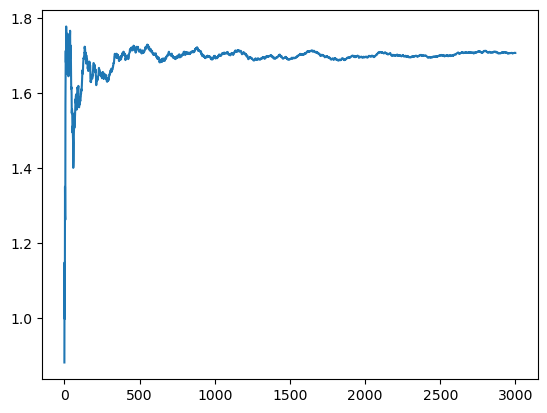

In [368]:
plt.plot(df['steps'], df['ave_value'])